In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

np.random.seed(10)

data=np.loadtxt("dz_data100_atek4.csv", delimiter=",")

data2=[]
for i in range(data.shape[0]):
    if data[i][2]==0:
        data2.append(data[i])

data3=np.asarray(data2)
dataset=data3[:,0:1].copy()
label=data3[:,1:2].copy()
    
dtrain,dtest,ltrain,ltest=train_test_split(dataset,label,train_size=0.7,random_state=10)



C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Nº neurônios: 5 

70/70 [==============================] - 0s 114us/step


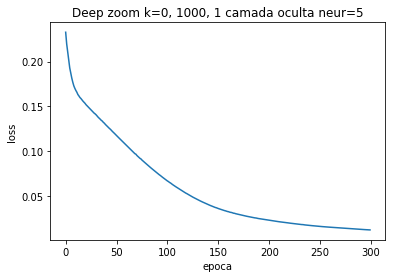

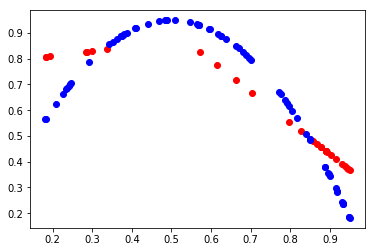

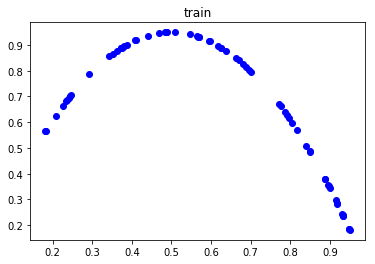

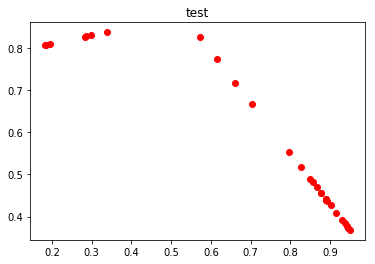

Nº neurônios: 10 

70/70 [==============================] - 0s 86us/step


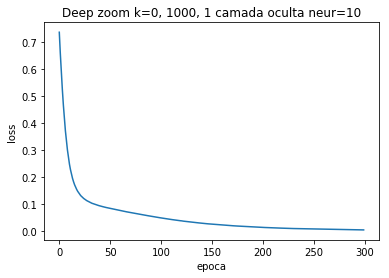

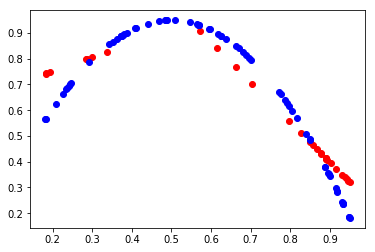

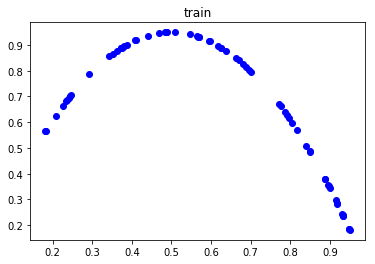

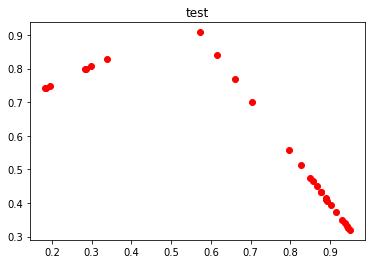

Nº neurônios: 15 

70/70 [==============================] - 0s 71us/step


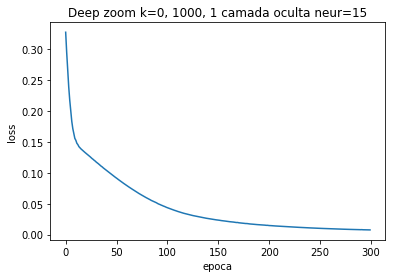

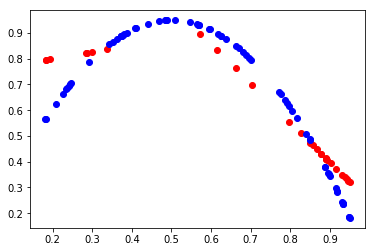

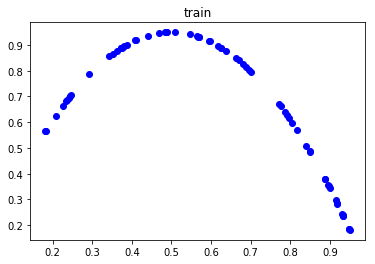

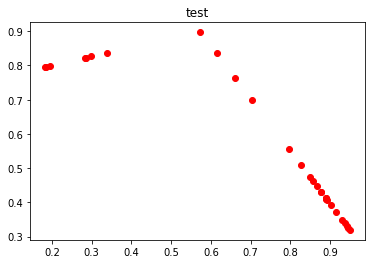

Nº neurônios: 20 

70/70 [==============================] - 0s 100us/step


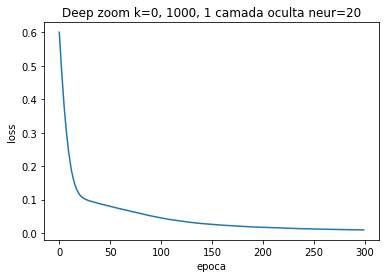

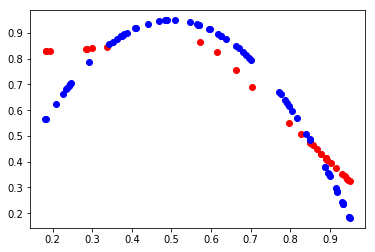

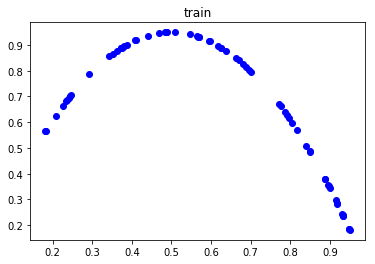

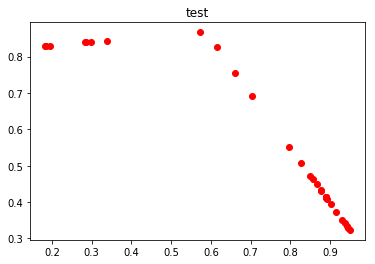

Nº neurônios: 25 

70/70 [==============================] - 0s 71us/step


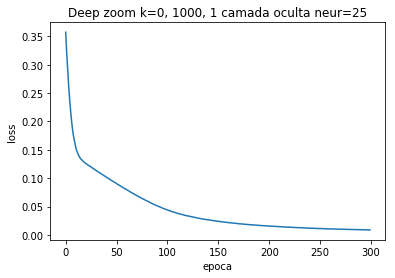

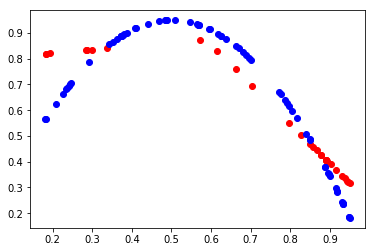

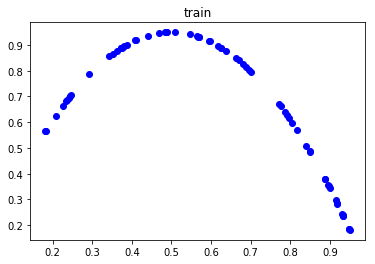

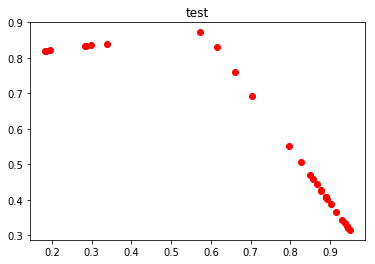

Nº neurônios: 30 

70/70 [==============================] - 0s 100us/step


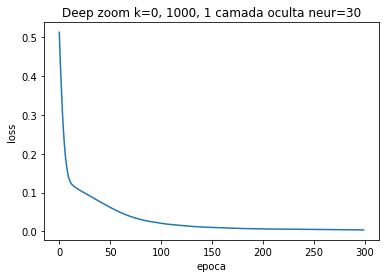

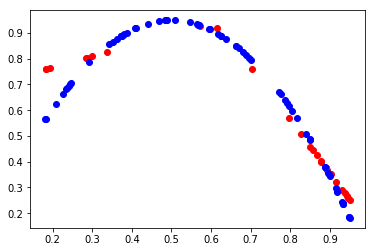

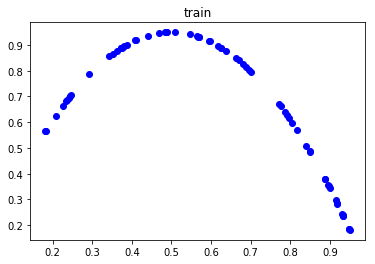

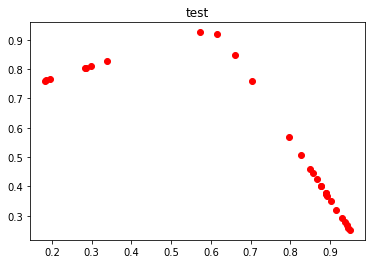

Nº neurônios: 35 

70/70 [==============================] - 0s 114us/step


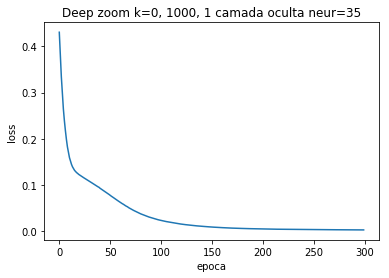

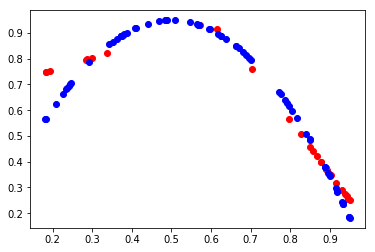

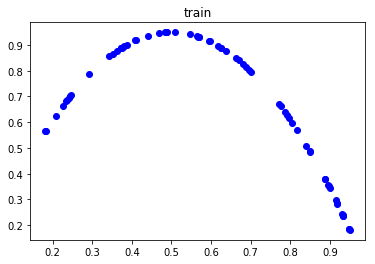

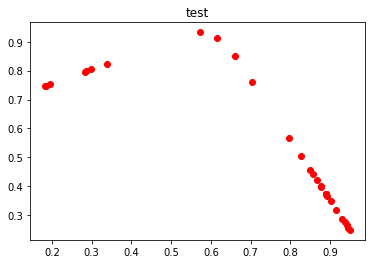

Nº neurônios: 40 

70/70 [==============================] - 0s 86us/step


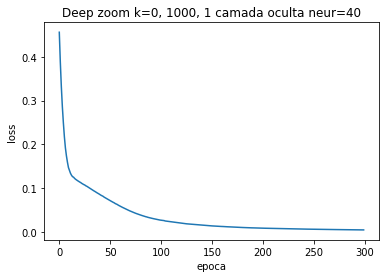

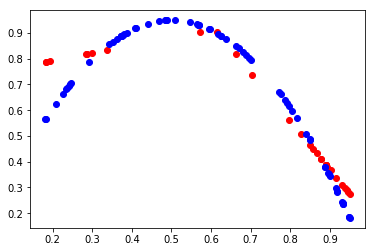

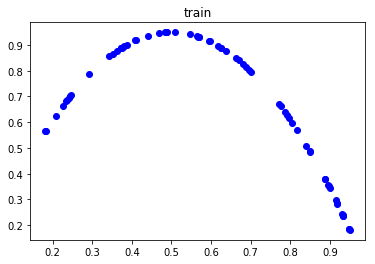

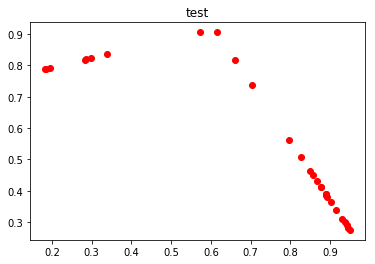

Nº neurônios: 45 

70/70 [==============================] - 0s 86us/step


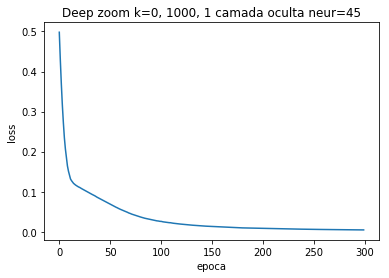

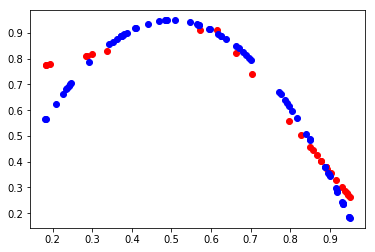

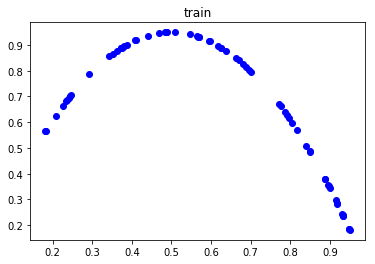

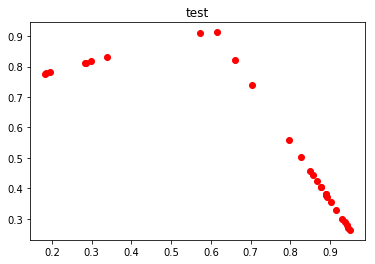

Nº neurônios: 50 

70/70 [==============================] - 0s 100us/step


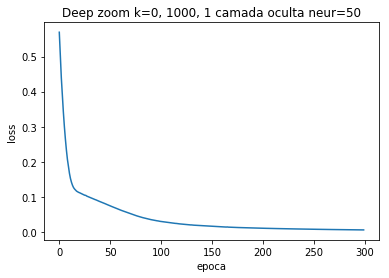

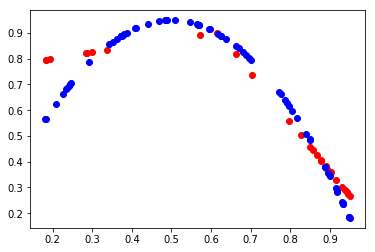

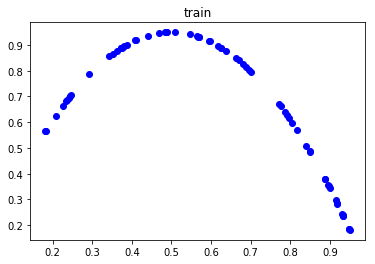

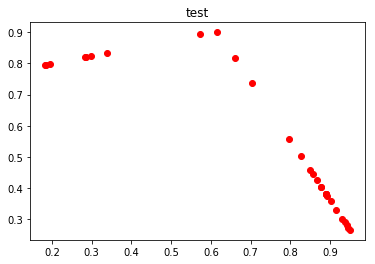

Nº neurônios: 60 

70/70 [==============================] - 0s 86us/step


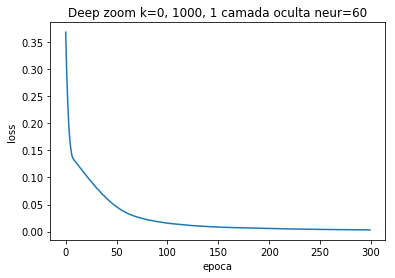

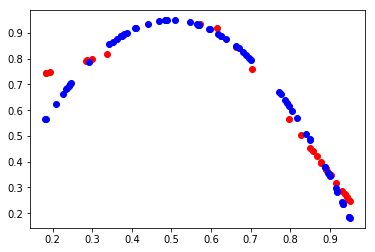

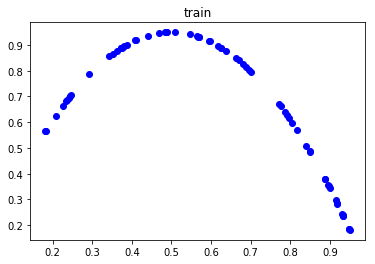

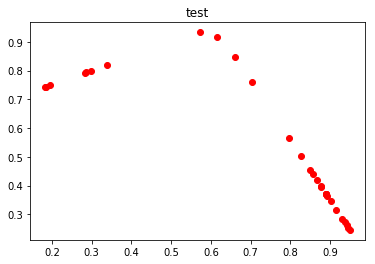

Nº neurônios: 70 

70/70 [==============================] - 0s 114us/step


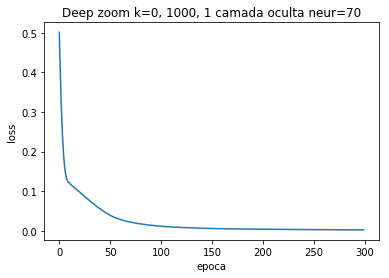

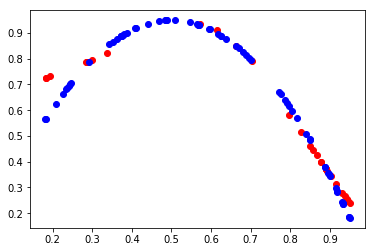

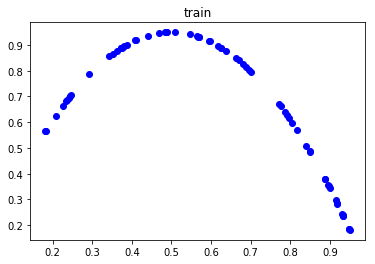

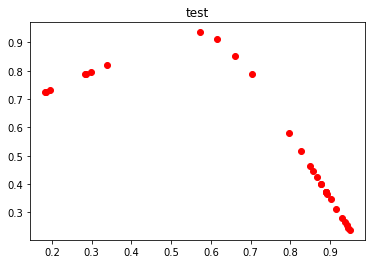

Nº neurônios: 80 

70/70 [==============================] - 0s 71us/step


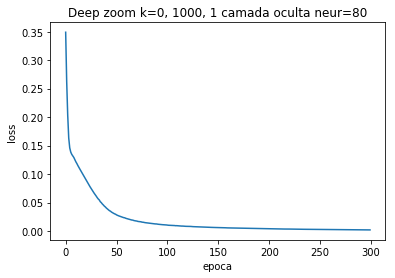

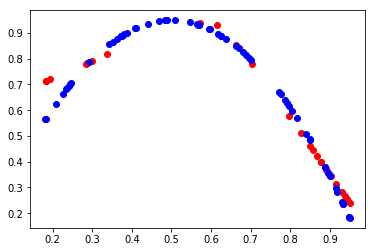

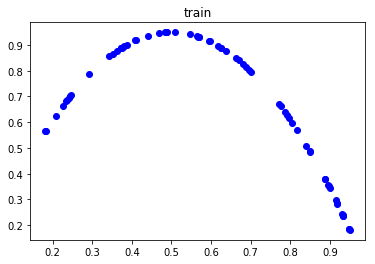

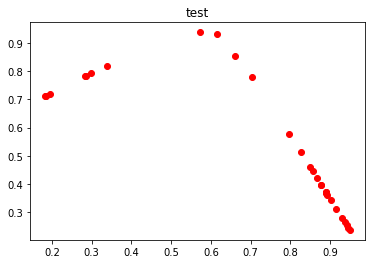

Nº neurônios: 90 

70/70 [==============================] - 0s 86us/step


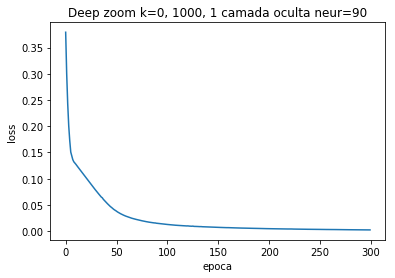

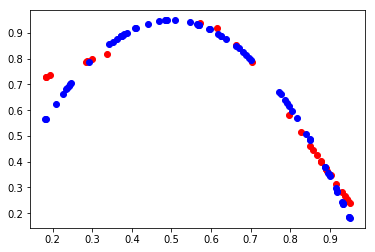

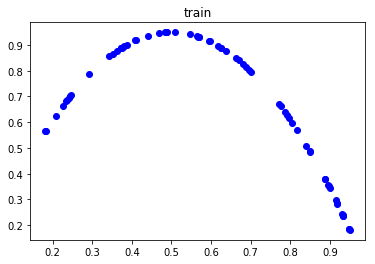

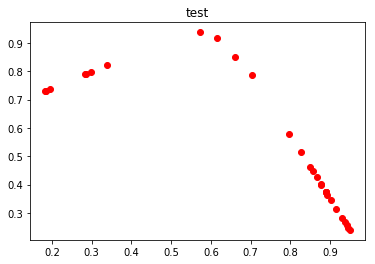

Nº neurônios: 100 

70/70 [==============================] - 0s 100us/step


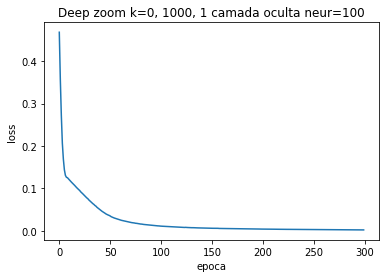

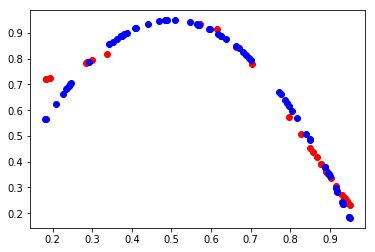

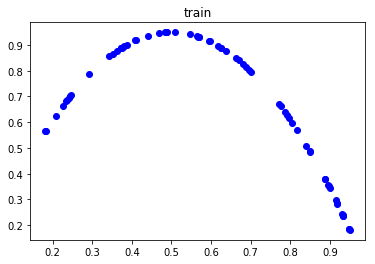

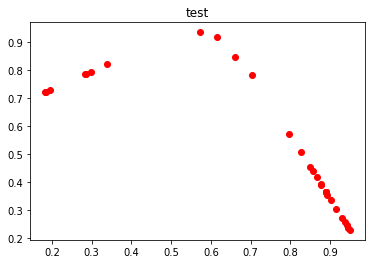

Nº neurônios: 200 

70/70 [==============================] - 0s 100us/step


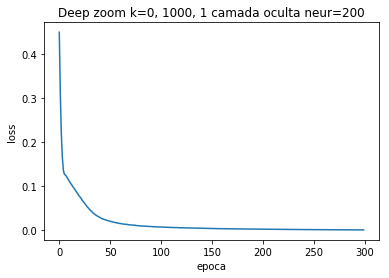

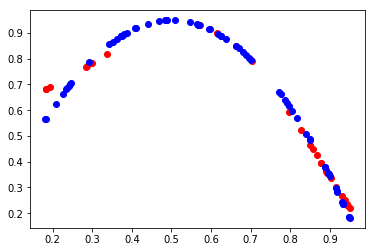

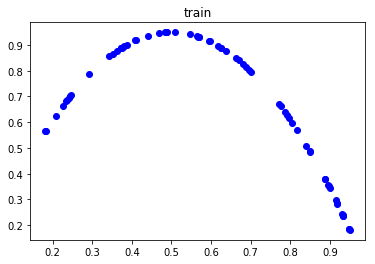

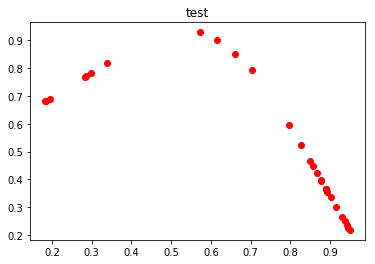

Nº neurônios: 300 

70/70 [==============================] - 0s 114us/step


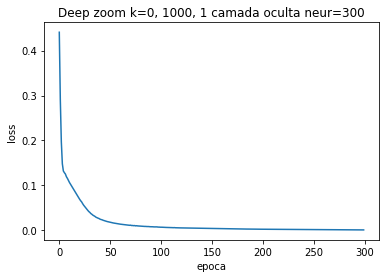

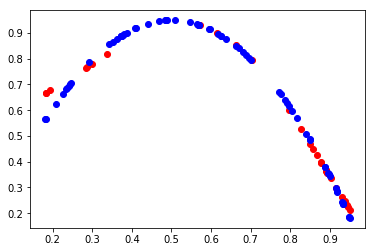

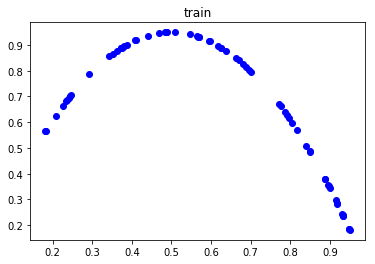

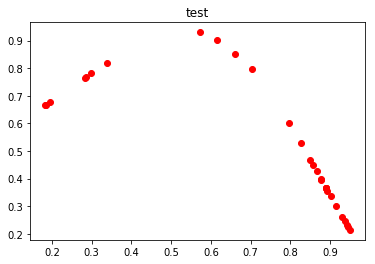

Nº neurônios: 400 

70/70 [==============================] - 0s 100us/step


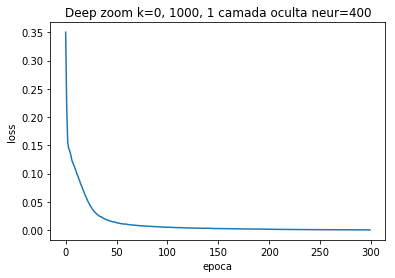

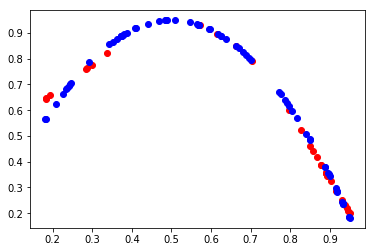

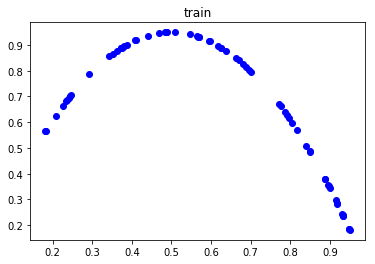

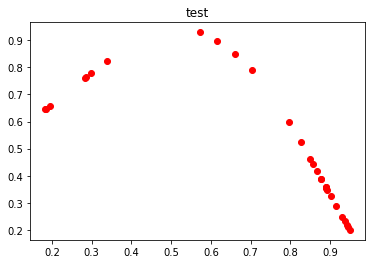

Nº neurônios: 500 

70/70 [==============================] - 0s 114us/step


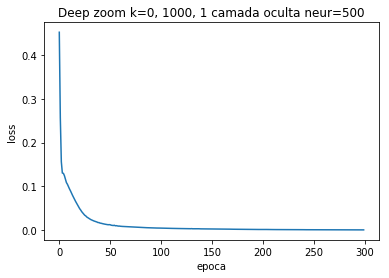

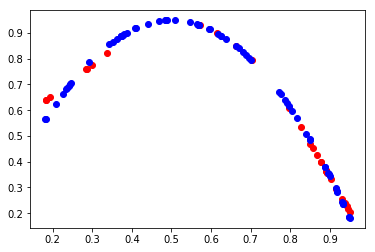

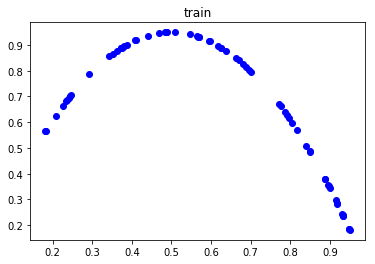

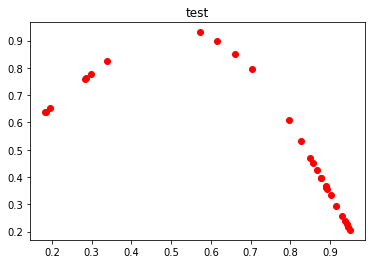

Nº neurônios: 600 

70/70 [==============================] - 0s 100us/step


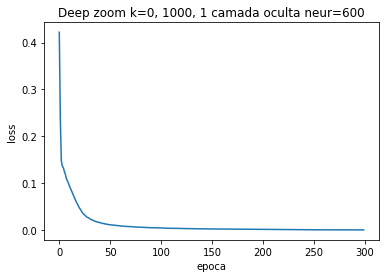

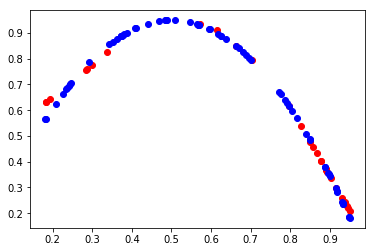

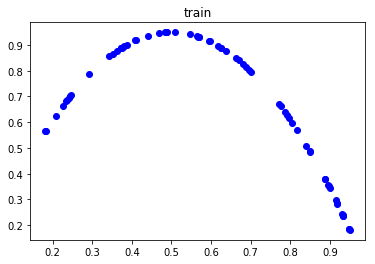

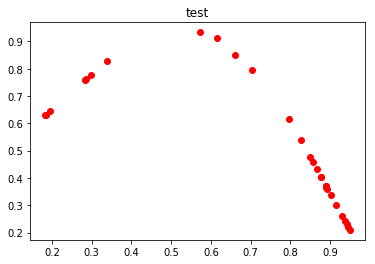

Nº neurônios: 700 

70/70 [==============================] - 0s 100us/step


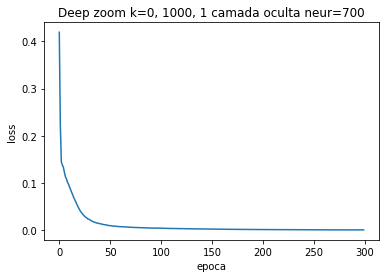

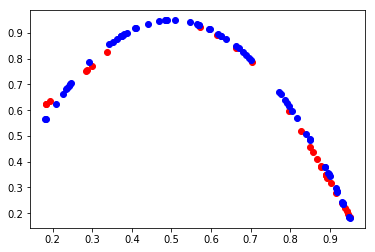

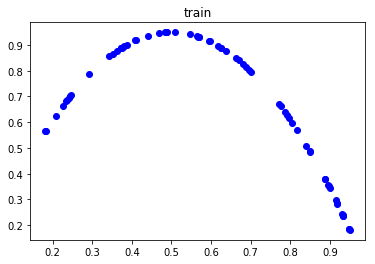

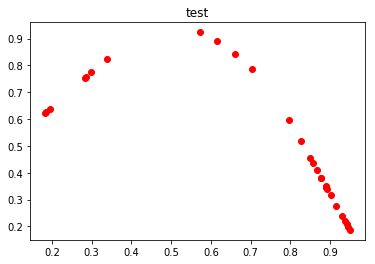

Nº neurônios: 800 

70/70 [==============================] - 0s 114us/step


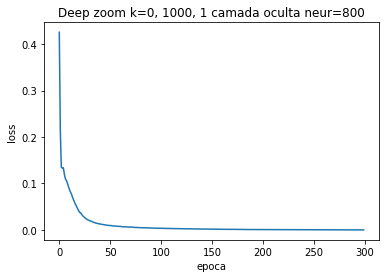

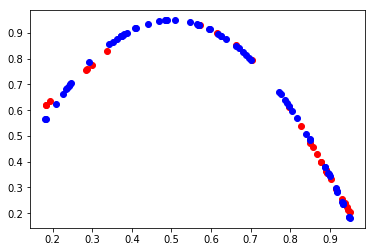

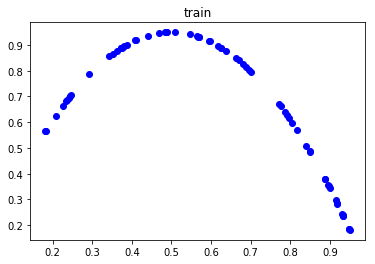

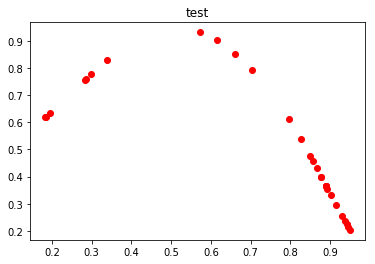

Nº neurônios: 900 

70/70 [==============================] - 0s 114us/step


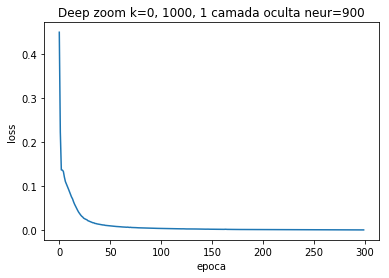

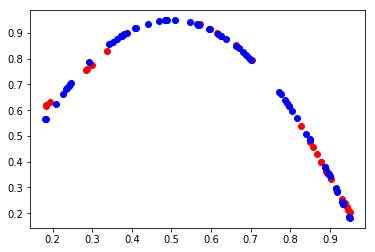

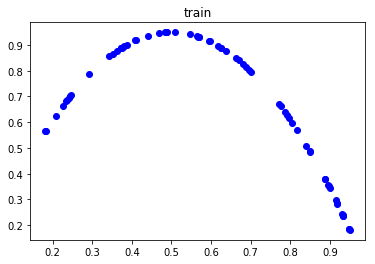

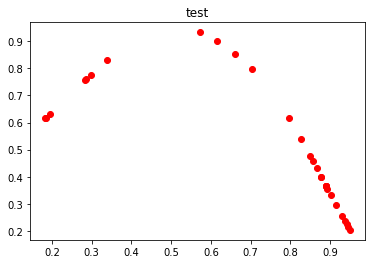

Nº neurônios: 1000 

70/70 [==============================] - 0s 71us/step


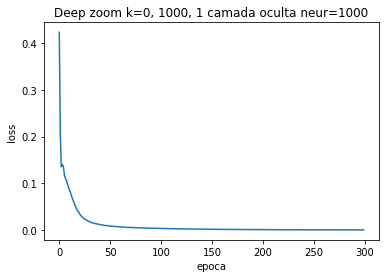

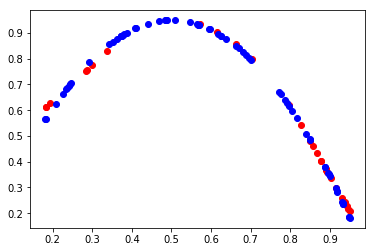

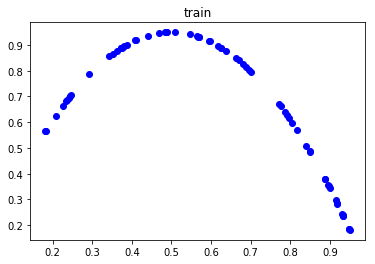

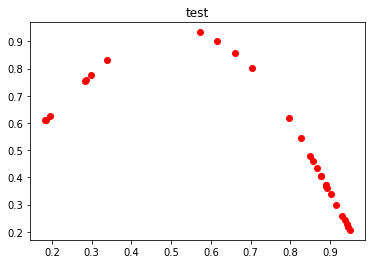

In [2]:
file= open("results_logis_data100_aproxk0_1.csv","w+")

n1=5


while n1<=1000:
    
    model = Sequential()
    model.add(Dense(n1, input_shape=(1,), activation='relu'))
    model.add(Dense(1, activation='linear'))

    #model.summary()

    adam=keras.optimizers.Adam()

    model.compile(optimizer=adam, loss='mean_squared_error')


    print("Nº neurônios:", n1,"\n")


    history = model.fit(dtrain, ltrain, epochs=300, batch_size=10,verbose=0)

    mse = model.evaluate(dtest, ltest)
    

    msetrain = model.evaluate(dtrain, ltrain)
    

    file.write('{}'.format(n1))
    file.write(',')
    file.write('{}'.format(msetrain))
    file.write(',')
    file.write('{}'.format(mse))
    file.write('\n')
    

    plt.plot(history.history['loss'])
    plt.title('Deep zoom k=0, 1000, 1 camada oculta neur=%i' %n1)
    plt.ylabel('loss')
    plt.xlabel('epoca')
    plt.show()
    
    faprox = model.predict(dtest)
  
    plt.plot(dtest,faprox, 'ro')
    plt.plot(dtrain,ltrain, 'bo')
    plt.show()
    
    plt.plot(dtrain,ltrain, 'bo')
    plt.title('train')
    plt.show()

    plt.plot(dtest,faprox, 'ro')
    plt.title('test')
    plt.show()
    

    if n1<50:
        n1+=5
    elif n1<100:
        n1+=10
    else:
        n1+=100
        
        

    

In [3]:
file.close()

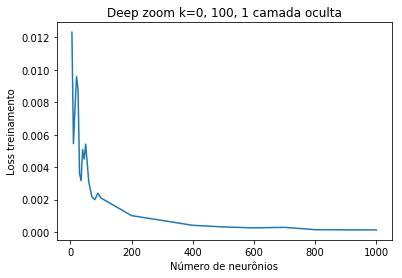

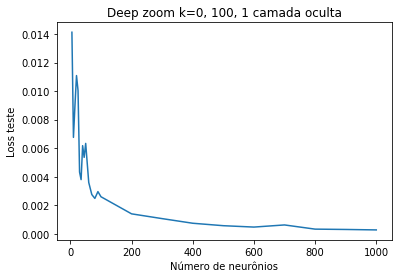

In [4]:

valores=np.loadtxt("results_logis_data100_aproxk0_1.csv", delimiter=",")

plt.plot(valores[:,0],valores[:,1])
plt.title('Deep zoom k=0, 100, 1 camada oculta')
plt.ylabel('Loss treinamento')
plt.xlabel('Número de neurônios')
plt.show()

plt.plot(valores[:,0],valores[:,2])
plt.title('Deep zoom k=0, 100, 1 camada oculta')
plt.ylabel('Loss teste')
plt.xlabel('Número de neurônios')
plt.show()


# 